<a href="https://colab.research.google.com/github/GustavoBraga2605/Checkpoint-01---SERS/blob/main/Checkpoint_01_SERS_2%C2%B0Semestre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação dos Dados

In [ ]:
import pandas as pd

In [ ]:
df = dados = pd.read_csv("/content/household_power_consumption.txt", sep=';', low_memory=False)

## 1. Carregue o dataset e exiba as 10 primeiras linhas.

In [ ]:
dados.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


## 2. Explique a diferênça entre as variáveis Global_active_power e Global_reactive_power.

In [ ]:
# Global_active_power e Global_reactive_power são ambas medidas de potência elétrica, mas representam aspectos diferentes:

# Global_active_power (Potência Ativa): Potência real consumida pela residência para realizar trabalho útil.
# É medida em quilowatts (kW) e é a potência que aciona eletrodomésticos, luzes e outros dispositivos para fazerem o seu trabalho.

# Global_reactive_power (Potência Reativa): Potência que não é usada para realizar trabalho, mas é necessária para manter os campos eletromagnéticos exigidos por certos tipos de equipamentos elétricos, como motores e transformadores.
# É medida em kilovolt-amperes reativos (kVAR). Embora não realize trabalho diretamente, é essencial para o funcionamento de muitos dispositivos e contribui para o fluxo total de potência no sistema.

## 3. Verifique se existem valores ausêntes no dataset. Quantifique-os.

In [ ]:
missing_values = dados.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Date                        0
Time                        1
Global_active_power         1
Global_reactive_power       1
Voltage                     1
Global_intensity            1
Sub_metering_1              1
Sub_metering_2              1
Sub_metering_3           3947
dtype: int64


## 4. Converta a coluna Date para o tipo de datetime e crie uma nova coluna com o dia da semana correspondente.

In [ ]:
dados['Date'] = pd.to_datetime(dados['Date'], format='%d/%m/%Y')
dados['Day_of_Week'] = dados['Date'].dt.day_name()
display(dados.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_of_Week
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,Saturday
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,Saturday
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,Saturday
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,Saturday
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,Saturday


## 5. Filtre os registros do ano de 2007 e calcule a média de consumo diário de Global_active_power.

In [ ]:
dados['Global_active_power'] = pd.to_numeric(dados['Global_active_power'], errors='coerce')
dados_2007 = dados[dados['Date'].dt.year == 2007]
daily_average_power_2007 = dados_2007.groupby('Date')['Global_active_power'].mean()
print("Média de consumo diário de Global_active_power em 2007:")
print(daily_average_power_2007.head())

Média de consumo diário de Global_active_power em 2007:
Date
2007-01-01    1.909031
2007-01-02    0.881414
2007-01-03    0.704204
2007-01-04    2.263481
2007-01-05    1.884281
Name: Global_active_power, dtype: float64


## 6. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha.

In [ ]:
df = dados
df['datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], dayfirst=True)
df = df.set_index('datetime')
df = df.drop(['Date', 'Time'], axis=1)

for col in ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

display(df.head())

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


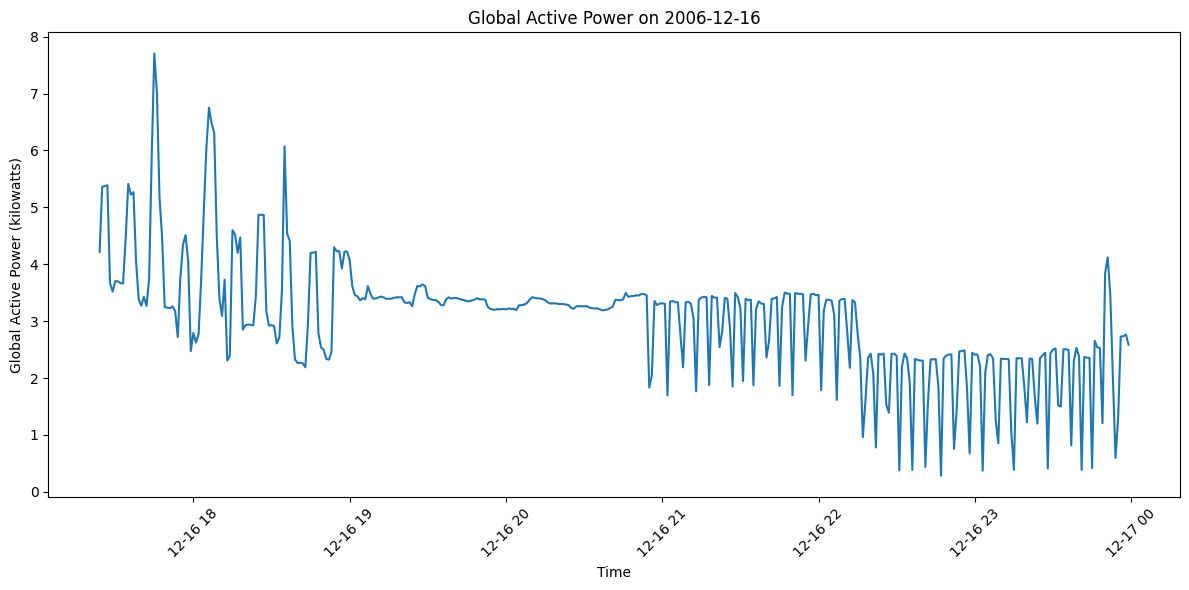

In [ ]:
import matplotlib.pyplot as plt

single_day_data = df.loc['2006-12-16']

plt.figure(figsize=(12, 6))
plt.plot(single_day_data.index, single_day_data['Global_active_power'])
plt.title('Global Active Power on 2006-12-16')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?

<Axes: >

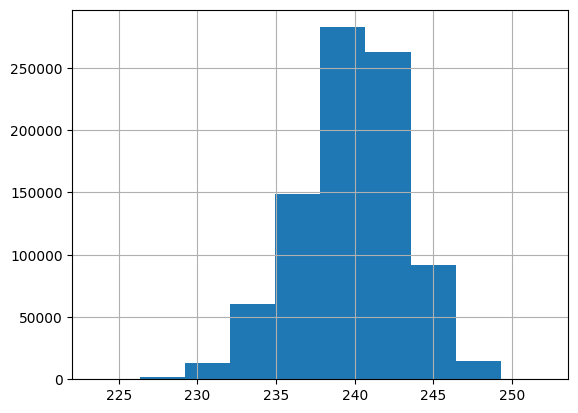

In [ ]:
df  = df.dropna()
df['Voltage'].hist()

In [ ]:
#O histograma da variável 'Voltage' mostra a frequência com que diferentes valores de tensão ocorrem no dataset.
#Observa-se que a distribuição é aproximadamente simétrica e centrada em torno de um valor,
#indicando que a tensão na rede elétrica da residência se mantém relativamente estável na maior parte do tempo.
#A maior concentração de leituras de tensão se encontra entre aproximadamente 235 e 245 Volts.

## 8. Calcule o consumo médio por mês em todo o período disponível no dataset.

In [ ]:
df['month'] = df.index.month
df['year'] = df.index.year
monthly_avg_consumption = df.groupby(['year', 'month'])['Global_active_power'].mean()
display(monthly_avg_consumption)

year  month
2006  12       1.901295
2007  1        1.546034
      2        1.401084
      3        1.318627
      4        0.891189
      5        0.985862
      6        0.826814
      7        0.667367
      8        0.764186
      9        0.969318
      10       1.103911
      11       1.294473
      12       1.626474
2008  1        1.459920
      2        1.181384
      3        1.245337
      4        1.115972
      5        1.024281
      6        0.994096
      7        0.794781
      8        0.293420
Name: Global_active_power, dtype: float64

## 9. Identifique o dia com maior consumo de energia ativa global (Global_active_power).

In [ ]:
daily_consumption = df.resample('D')['Global_active_power'].sum()
day_with_highest_consumption = daily_consumption.idxmax()
max_consumption = daily_consumption.max()

print(f"O dia com o maior consumo de energia ativa global foi {day_with_highest_consumption.date()} com um total de {max_consumption:.2f}.")

O dia com o maior consumo de energia ativa global foi 2006-12-23 com um total de 4773.39.


## 10. Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.

In [ ]:
df['weekday'] = df.index.dayofweek
df['is_weekend'] = df['weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

weekly_avg_consumption = df.groupby('is_weekend')['Global_active_power'].mean()
display(weekly_avg_consumption)

,Global_active_power
is_weekend,
Weekday,1.040998
Weekend,1.288652


## 11. Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity.


In [ ]:
correlation_matrix = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr()
print("Matriz de Correlação:")
display(correlation_matrix)


Matriz de Correlação:


,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Global_active_power,1.000000,0.253405,-0.385011,0.999005
Global_reactive_power,0.253405,1.000000,-0.111346,0.270435
Voltage,-0.385011,-0.111346,1.000000,-0.395486
Global_intensity,0.999005,0.270435,-0.395486,1.000000


## 12. Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1, Sub_metering_2 e Sub_metering_3.


In [ ]:
df['Total_Sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
display(df.head())

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,month,year,weekday,is_weekend,Total_Sub_metering
datetime,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,12,2006,5,Weekend,18.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,12,2006,5,Weekend,17.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,12,2006,5,Weekend,19.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,12,2006,5,Weekend,18.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,12,2006,5,Weekend,18.0


## 13. Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de Global_active_power.

In [ ]:
monthly_total_sub_metering = df.groupby(['year', 'month'])['Total_Sub_metering'].mean()
comparison = monthly_total_sub_metering > monthly_avg_consumption
print("\nMeses onde o consumo de Total_Sub_metering ultrapassa a média de Global_active_power:")
display(comparison[comparison].index.tolist())


Meses onde o consumo de Total_Sub_metering ultrapassa a média de Global_active_power:


[(2006, 12),
 (2007, 1),
 (2007, 2),
 (2007, 3),
 (2007, 4),
 (2007, 5),
 (2007, 6),
 (2007, 7),
 (2007, 8),
 (2007, 9),
 (2007, 10),
 (2007, 11),
 (2007, 12),
 (2008, 1),
 (2008, 2),
 (2008, 3),
 (2008, 4),
 (2008, 5),
 (2008, 6),
 (2008, 7),
 (2008, 8)]

## 14. Faça um gráfico de série temporal do Voltage para o ano de 2008.

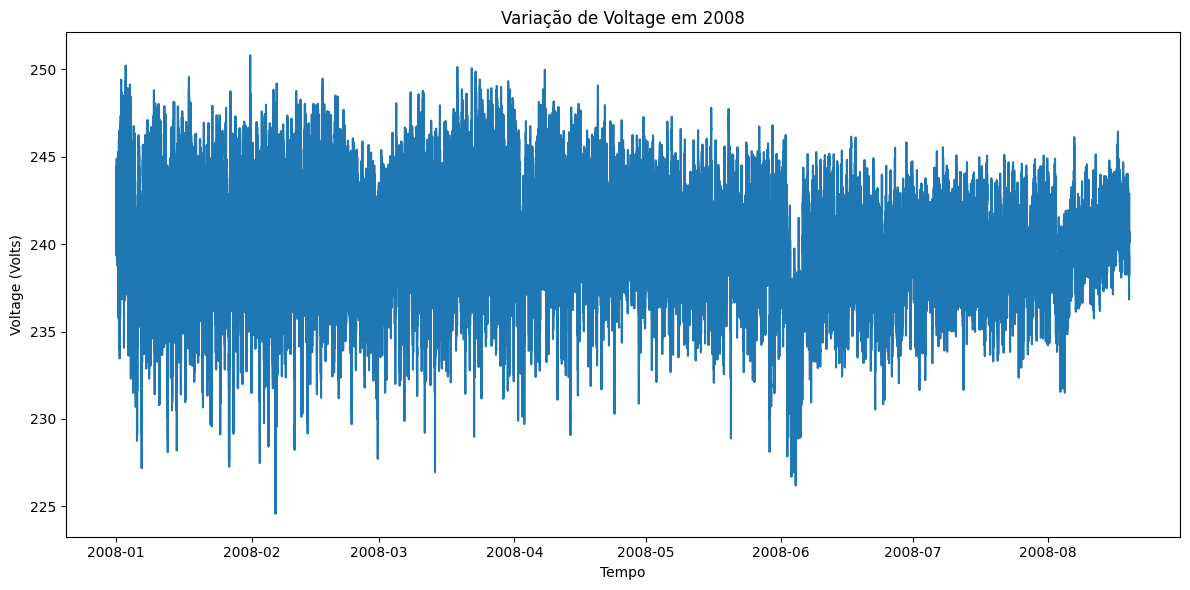

In [ ]:
voltage_2008 = df[df.index.year == 2008]['Voltage']

plt.figure(figsize=(12, 6))
plt.plot(voltage_2008.index, voltage_2008)
plt.title('Variação de Voltage em 2008')
plt.xlabel('Tempo')
plt.ylabel('Voltage (Volts)')
plt.tight_layout()
plt.show()


## 15. Compare o consumo entre os meses de verão e inverno (no hemisfério norte).

In [ ]:
summer_months = [6, 7, 8]
winter_months = [12, 1, 2]

summer_consumption = df[df.index.month.isin(summer_months)]['Global_active_power'].mean()
winter_consumption = df[df.index.month.isin(winter_months)]['Global_active_power'].mean()

print(f"Consumo médio de Global_active_power no verão (Hemisfério Norte): {summer_consumption:.2f}")
print(f"Consumo médio de Global_active_power no inverno (Hemisfério Norte): {winter_consumption:.2f}")

Consumo médio de Global_active_power no verão (Hemisfério Norte): 0.75
Consumo médio de Global_active_power no inverno (Hemisfério Norte): 1.49


## 16. Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa.


<function seaborn.distributions.kdeplot(data=None, *, x=None, y=None, hue=None, weights=None, palette=None, hue_order=None, hue_norm=None, color=None, fill=None, multiple='layer', common_norm=True, common_grid=False, cumulative=False, bw_method='scott', bw_adjust=1, warn_singular=True, log_scale=None, levels=10, thresh=0.05, gridsize=200, cut=3, clip=None, legend=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)>

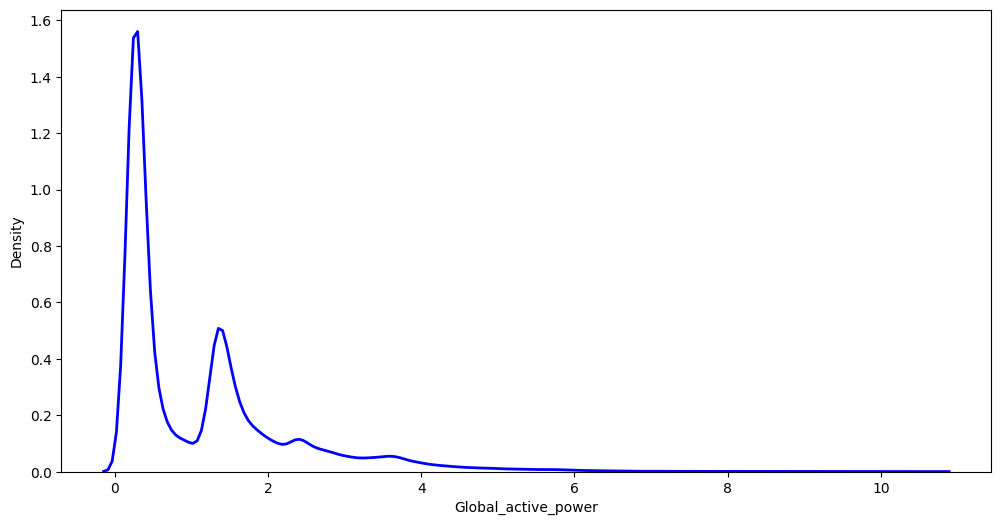

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

amostra = df.sample(frac=0.01, random_state=42)

plt.figure(figsize=(12, 6))

sns.kdeplot(df['Global_active_power'], label='Base completa', color='blue', linewidth=2)
sns.kdeplot


## 17. Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais.

In [ ]:
if 'df' in locals() and df is not None and not df.empty:
    numerical_cols_df = df.select_dtypes(include='number')
    print("Numerical columns in the DataFrame:")
    print(numerical_cols_df.columns.tolist())
else:
    print("DataFrame 'df' not found or is empty. Cannot identify numerical columns.")

Numerical columns in the DataFrame:
['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'month', 'year', 'weekday', 'Total_Sub_metering']


## 18. Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interpret os resultados.

In [ ]:
import pandas as pd

try:
    df = pd.read_csv('/content/household_power_consumption.txt', sep=';', low_memory=False)
    print("DataFrame loaded successfully.")

    df.dropna(inplace=True)
    print(f"Shape after dropping missing values: {df.shape}")

    df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
    df.dropna(subset=['Global_active_power'], inplace=True)
    print(f"Shape after converting 'Global_active_power' and dropping NaNs: {df.shape}")

    display(df.head())
    display(df.info())

except FileNotFoundError:
    print("Error: The file was not found at /content/household_power_consumption.txt")
except Exception as e:
    print(f"An error occurred: {e}")

DataFrame loaded successfully.
Shape after dropping missing values: (1054851, 9)
Shape after converting 'Global_active_power' and dropping NaNs: (1054851, 9)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


<class 'pandas.core.frame.DataFrame'>
Index: 1054851 entries, 0 to 1058920
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1054851 non-null  object 
 1   Time                   1054851 non-null  object 
 2   Global_active_power    1054851 non-null  float64
 3   Global_reactive_power  1054851 non-null  object 
 4   Voltage                1054851 non-null  object 
 5   Global_intensity       1054851 non-null  object 
 6   Sub_metering_1         1054851 non-null  object 
 7   Sub_metering_2         1054851 non-null  object 
 8   Sub_metering_3         1054851 non-null  float64
dtypes: float64(2), object(7)
memory usage: 80.5+ MB


None

## 19. Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power em um período de 6 meses

In [ ]:
import pandas as pd

try:
    df = pd.read_csv('/content/household_power_consumption.txt', sep=';', low_memory=False)
    print("DataFrame loaded successfully.")

    df['DateTime'] = df['Date'].astype(str) + ' ' + df['Time'].astype(str)


    df['DateTime'] = pd.to_datetime(df['DateTime'])


    df.set_index('DateTime', inplace=True)


    df.dropna(inplace=True)
    print(f"Shape after dropping missing values: {df.shape}")


    df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
    df.dropna(subset=['Global_active_power'], inplace=True)
    print(f"Shape after converting 'Global_active_power' and dropping NaNs: {df.shape}")

    display(df.head())
    display(df.info())

except FileNotFoundError:
    print("Error: The file was not found at /content/household_power_consumption.txt")
except Exception as e:
    print(f"An error occurred: {e}")

DataFrame loaded successfully.


/tmp/ipython-input-3328048894.py:10: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['DateTime'])


Shape after dropping missing values: (1070877, 9)
Shape after converting 'Global_active_power' and dropping NaNs: (1070877, 9)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1070877 entries, 2006-12-16 17:24:00 to 2009-01-01 05:10:00
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1070877 non-null  object 
 1   Time                   1070877 non-null  object 
 2   Global_active_power    1070877 non-null  float64
 3   Global_reactive_power  1070877 non-null  object 
 4   Voltage                1070877 non-null  object 
 5   Global_intensity       1070877 non-null  object 
 6   Sub_metering_1         1070877 non-null  object 
 7   Sub_metering_2         1070877 non-null  object 
 8   Sub_metering_3         1070877 non-null  float64
dtypes: float64(2), object(7)
memory usage: 81.7+ MB


None

## 20. Treine um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity. Avalie o erro do modelo


In [ ]:
import pandas as pd

try:
    df = pd.read_csv('/content/household_power_consumption.txt', sep=';', low_memory=False)
    print("DataFrame loaded successfully.")

    df.dropna(inplace=True)
    print(f"Shape after dropping missing values: {df.shape}")

    df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
    df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')

    df.dropna(subset=['Global_active_power', 'Global_intensity'], inplace=True)
    print(f"Shape after converting columns and dropping NaNs: {df.shape}")

    display(df.head())
    display(df.info())

except FileNotFoundError:
    print("Error: The file was not found at /content/household_power_consumption.txt")
except Exception as e:
    print(f"An error occurred: {e}")

DataFrame loaded successfully.
Shape after dropping missing values: (1119778, 9)
Shape after converting columns and dropping NaNs: (1119778, 9)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.4,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.0,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.0,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.0,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.8,0.000,1.000,17.0


<class 'pandas.core.frame.DataFrame'>
Index: 1119778 entries, 0 to 1123886
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1119778 non-null  object 
 1   Time                   1119778 non-null  object 
 2   Global_active_power    1119778 non-null  float64
 3   Global_reactive_power  1119778 non-null  object 
 4   Voltage                1119778 non-null  object 
 5   Global_intensity       1119778 non-null  float64
 6   Sub_metering_1         1119778 non-null  object 
 7   Sub_metering_2         1119778 non-null  object 
 8   Sub_metering_3         1119778 non-null  float64
dtypes: float64(3), object(6)
memory usage: 85.4+ MB


None

DataFrame loaded successfully.
Shape after dropping missing values: (1136085, 9)
Shape after converting 'Global_active_power' and dropping NaNs: (1136085, 9)


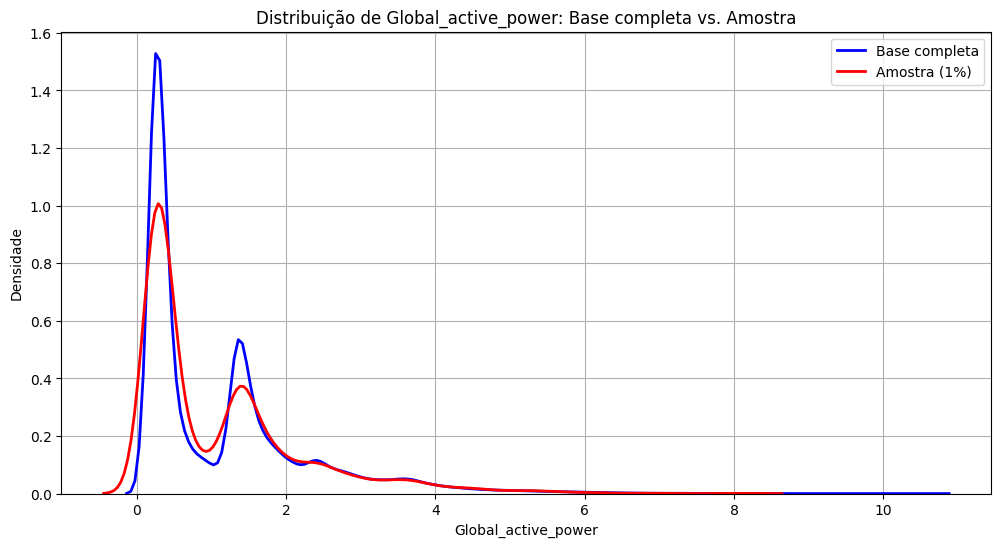

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('/content/household_power_consumption.txt', sep=';', low_memory=False)
    print("DataFrame loaded successfully.")

    df.dropna(inplace=True)
    print(f"Shape after dropping missing values: {df.shape}")

    df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
    df.dropna(subset=['Global_active_power'], inplace=True)
    print(f"Shape after converting 'Global_active_power' and dropping NaNs: {df.shape}")

    amostra = df.sample(frac=0.01, random_state=42)

    plt.figure(figsize=(12, 6))

    sns.kdeplot(df['Global_active_power'], label='Base completa', color='blue', linewidth=2)
    sns.kdeplot(amostra['Global_active_power'], label='Amostra (1%)', color='red', linewidth=2)

    plt.title('Distribuição de Global_active_power: Base completa vs. Amostra')
    plt.xlabel('Global_active_power')
    plt.ylabel('Densidade')
    plt.legend()
    plt.grid(True)
    plt.show()

except FileNotFoundError:
    print("Error: The file was not found at /content/household_power_consumption.txt")
except Exception as e:
    print(f"An error occurred: {e}")

## 21. Séries temporais por hora.

Converta Date e Time em índice datetime.

Reamostre os dados em intervalos de 1 hora, calculando a média de Global_active_power.

Identifique os horários de maior consumo médio ao longo do dia.

Observação: uma série temporal é um conjunto de dados registrados em ordem cronológica, útil para identificar padrões de comportamento ao longo do tempo.


In [ ]:
import pandas as pd
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('DateTime', inplace=True)
df_hourly = df['Global_active_power'].resample('H').mean()

print("Average Global Active Power per hour:")
display(df_hourly.head())

hourly_avg_consumption = df_hourly.groupby(df_hourly.index.hour).mean()
highest_consumption_hour = hourly_avg_consumption.idxmax()

print(f"\nHours with the highest average consumption throughout the day:")
display(hourly_avg_consumption.sort_values(ascending=False).head())

Average Global Active Power per hour:


/tmp/ipython-input-3776912857.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
/tmp/ipython-input-3776912857.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df['Global_active_power'].resample('H').mean()


,Global_active_power
DateTime,
2006-12-16 17:00:00,4.222889
2006-12-16 18:00:00,3.632200
2006-12-16 19:00:00,3.400233
2006-12-16 20:00:00,3.268567
2006-12-16 21:00:00,3.056467



Hours with the highest average consumption throughout the day:


,Global_active_power
DateTime,
20,2.017812
21,1.990006
19,1.867451
7,1.507841
8,1.505180


## 22. Autocorrelação do consumo.
Use a série temporal de Global_active_power.

Calcule a autocorrelação em lags de 1h, 24h e 48h.

Pergunta: existem padrões repetidos diariamente?


In [ ]:
#22. Autocorrelação do consumo. Use a série temporal de Global_active_power. Calcule a autocorrelação em lags de 1h, 24h e 48h. Pergunta: existem padrões repetidos diariamente?
autocorr_1h = df_hourly.autocorr(lag=1)
autocorr_24h = df_hourly.autocorr(lag=24)
autocorr_48h = df_hourly.autocorr(lag=48)

print(f"Autocorrelation at 1 hour lag: {autocorr_1h:.2f}")
print(f"Autocorrelation at 24 hour lag: {autocorr_24h:.2f}")
print(f"Autocorrelation at 48 hour lag: {autocorr_48h:.2f}")

print("\nInterpretation:")
if autocorr_24h > 0.5:
    print("There is a strong positive autocorrelation at a 24-hour lag, indicating a strong daily pattern in Global_active_power consumption.")
elif autocorr_24h > 0:
    print("There is a positive autocorrelation at a 24-hour lag, suggesting some daily pattern in Global_active_power consumption.")
else:
    print("There is weak or no positive autocorrelation at a 24-hour lag, suggesting no strong daily pattern in Global_active_power consumption.")

Autocorrelation at 1 hour lag: 0.73
Autocorrelation at 24 hour lag: 0.43
Autocorrelation at 48 hour lag: 0.39

Interpretation:
There is a positive autocorrelation at a 24-hour lag, suggesting some daily pattern in Global_active_power consumption.


## 23. Redução de dimensionalidade com PCA.
Selecione Global_active_power, Global_reactive_power, Voltage e Global_intensity.

Aplique PCA para reduzir para 2 componentes principais.

Analise a variância explicada por cada componente


In [ ]:
df_pca_cols = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']]

print("Missing values before dropping:")
missing_values_pca = df_pca_cols.isnull().sum()
display(missing_values_pca)

df_pca_cols.dropna(inplace=True)

print("\nMissing values after dropping:")
missing_values_pca_after = df_pca_cols.isnull().sum()
display(missing_values_pca_after)

display(df_pca_cols.head())

Missing values before dropping:


,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0



Missing values after dropping:


/tmp/ipython-input-2733607284.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca_cols.dropna(inplace=True)


,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0


,Global_active_power,Global_reactive_power,Voltage,Global_intensity
DateTime,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400
2006-12-16 17:25:00,5.360,0.436,233.630,23.000
2006-12-16 17:26:00,5.374,0.498,233.290,23.000
2006-12-16 17:27:00,5.388,0.502,233.740,23.000
2006-12-16 17:28:00,3.666,0.528,235.680,15.800


## 24. Visualização de clusters no espaço PCA.
Combine os resultados do PCA com K-Means (3 clusters).

Plote os pontos resultantes e pinte cada grupo por cluster.

Pergunta: os grupos se separam de forma clara?


,Global_active_power,Global_reactive_power,Voltage,Global_intensity
DateTime,,,,
2006-12-16 17:24:00,2.721335,2.773031,-1.580286,2.847073
2006-12-16 17:25:00,3.729799,2.938520,-1.934017,3.809725
2006-12-16 17:26:00,3.742140,3.508536,-2.033412,3.809725
2006-12-16 17:27:00,3.754482,3.545311,-1.901860,3.809725
2006-12-16 17:28:00,2.236497,3.784350,-1.334721,2.302965


,Principal Component 1,Principal Component 2
DateTime,,
2006-12-16 17:24:00,4.848375,1.471667
2006-12-16 17:25:00,6.256482,1.280838
2006-12-16 17:26:00,6.462198,1.788412
2006-12-16 17:27:00,6.429544,1.858666
2006-12-16 17:28:00,4.397507,2.622673


,Principal Component 1,Principal Component 2,Cluster
DateTime,,,
2006-12-16 17:24:00,4.848375,1.471667,2
2006-12-16 17:25:00,6.256482,1.280838,2
2006-12-16 17:26:00,6.462198,1.788412,2
2006-12-16 17:27:00,6.429544,1.858666,2
2006-12-16 17:28:00,4.397507,2.622673,2


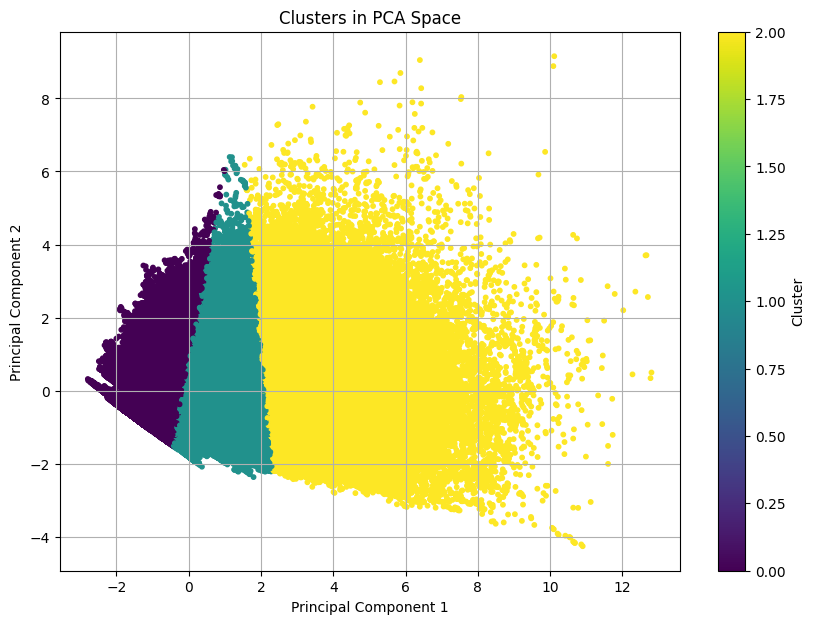

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca_cols)

# Convert back to DataFrame for easier handling
df_pca_scaled = pd.DataFrame(df_pca_scaled, columns=df_pca_cols.columns, index=df_pca_cols.index)

display(df_pca_scaled.head())

from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
df_pca_result = pca.fit_transform(df_pca_scaled)

# Convert the results back to a DataFrame
df_pca_result = pd.DataFrame(df_pca_result, columns=['Principal Component 1', 'Principal Component 2'], index=df_pca_scaled.index)

display(df_pca_result.head())

from sklearn.cluster import KMeans
import numpy as np

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_pca_result['Cluster'] = kmeans.fit_predict(df_pca_result)

display(df_pca_result.head())

import matplotlib.pyplot as plt

# Visualize the clusters in the PCA space
plt.figure(figsize=(10, 7))
plt.scatter(df_pca_result['Principal Component 1'], df_pca_result['Principal Component 2'], c=df_pca_result['Cluster'], cmap='viridis', s=10)
plt.title('Clusters in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

## 25. Regressão polinomial vs linear.
Modele Global_active_power em função de Voltage.

Compare Regressão Linear Simples com Regressão Polinomial (grau 2).

Analise RMSE e a curva ajustada.


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming 'df' DataFrame is already loaded and cleaned as in previous steps

# Select features and target
X = df[['Voltage']]
y = df['Global_active_power']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of training data:")
print(X_train.shape, y_train.shape)
print("\nShape of testing data:")
print(X_test.shape, y_test.shape)

Shape of training data:
(908868, 1) (908868,)

Shape of testing data:
(227217, 1) (227217,)


In [ ]:
# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train Polynomial Regression model (degree 2)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

print("Linear Model trained.")
print("Polynomial Model trained.")

Linear Model trained.
Polynomial Model trained.


In [ ]:
# Make predictions
y_pred_linear = linear_model.predict(X_test)
X_test_poly = poly_features.transform(X_test)
y_pred_poly = poly_model.predict(X_test_poly)

print("Predictions made for both models.")

Predictions made for both models.


In [ ]:
# Evaluate models using RMSE
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print(f"RMSE for Linear Regression: {rmse_linear:.2f}")
print(f"RMSE for Polynomial Regression (Degree 2): {rmse_poly:.2f}")

RMSE for Linear Regression: 1.05
RMSE for Polynomial Regression (Degree 2): 1.04


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


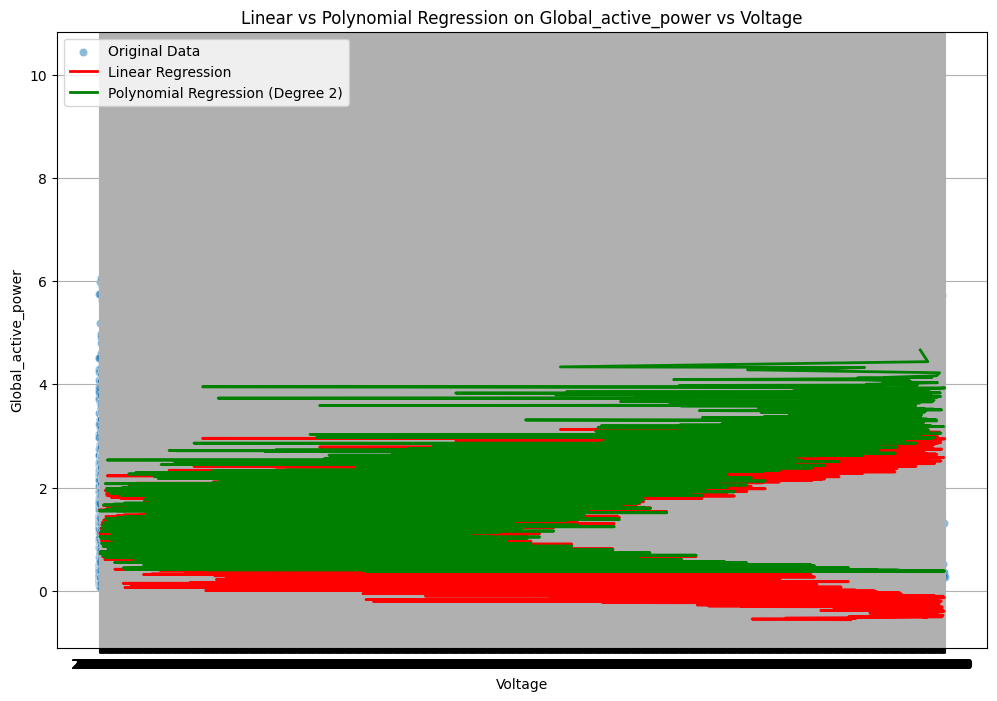

In [ ]:
# Sort test data for plotting smooth curves
X_test_sorted = np.sort(X_test, axis=0)
y_pred_linear_sorted = linear_model.predict(X_test_sorted)
X_test_poly_sorted = poly_features.transform(X_test_sorted)
y_pred_poly_sorted = poly_model.predict(X_test_poly_sorted)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_test['Voltage'].values, y=y_test.values, alpha=0.5, label='Original Data')
plt.plot(X_test_sorted.flatten(), y_pred_linear_sorted, color='red', linewidth=2, label='Linear Regression')
plt.plot(X_test_sorted.flatten(), y_pred_poly_sorted, color='green', linewidth=2, label='Polynomial Regression (Degree 2)')

plt.title('Linear vs Polynomial Regression on Global_active_power vs Voltage')
plt.xlabel('Voltage')
plt.ylabel('Global_active_power')
plt.legend()
plt.grid(True)
plt.show()

**Analysis and Interpretation:**

Based on the calculated RMSE values and the visualization:

- **RMSE Comparison:** A lower RMSE indicates a better fit. Compare the RMSE values for the linear and polynomial models. The model with the lower RMSE is generally considered to have a better predictive performance on the test data.

- **Visual Comparison:** Observe the plots. The linear regression model fits a straight line to the data, while the polynomial regression model fits a curve. See which line/curve appears to follow the general trend of the data points more closely. Polynomial regression of degree 2 can capture a slight curvature in the relationship between 'Voltage' and 'Global_active_power' if it exists.

- **Conclusion:** Based on both the RMSE and the visual inspection, determine which model provides a better fit for predicting 'Global_active_power' from 'Voltage' in this dataset.